## 2.7 深度学习常用的归一化方法

机器学习中归一化方法很多，如L1、L2归一化, dropout、批量归一化、层归一化、，实例归一化、Group归一化等等,由于篇幅的限制，这里我们主要介绍深度学习中两种常用的归一化方法，即批量归一化（Batch Normalization）和层归一化（Layer Normalization）。
### 2.7.1归一化方法简介
批量归一化和层归一化方法在深度学习中应用非常普遍，涉及的数据包括一维或多维。为更好理解这些归一化方法，我们首先从直观的图形，然后，再说明其背后的原理，最后，通过具体代码实现这些归一化方法。  
（1）输入数据为一维的情况  
1）批量归一化的如图2-48所示。  
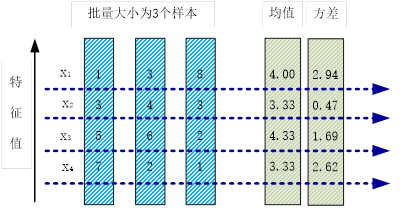
图2-48     批量归一化
批量归一化对每个批量样本中的每个特征值分别进行均值和方差的计算。  
2）层归一化的图2-49所示。
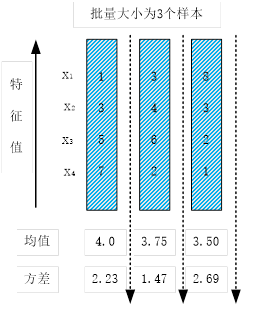
层归一化对每个批量样本中的每个样本分别进行均值和方差计算。  
（2）输入数据为多维的情况  
这里以输入数据为4维（Batch、channels、Hight、width）为例，多维数据常用归一化方法，如图2-50所示。
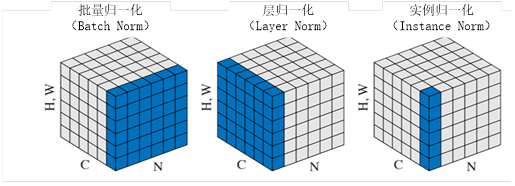
图2-50 输入数据为多维的几种常用归一化方法
图2-50中N标识批量大小，C表示通道数量，H表示图像的高， W表示图像宽。  
1）批量归一化（BatchNorm）。批次（Batch）方向做归一化，计算NHW的均值，对小批量（Small Batch Size）效果不好；批量归一化主要缺点是对批量的大小比较敏感，由于每次计算均值和方差是在一个批次上，所以如果批量太小，则计算的均值、方差不足以代表整个数据分布。  
2）层归一化（LayerNorm）。通道（Channel）方向做归一化，算CHW的均值，主要对RNN作用明显。如LayerNorm在Transformer模型中被广泛使用。  
3）实例归一化（Instance Normalization）。一个通道内做归一化，算H*W的均值，用在风格化迁移；因为在图像风格化中，生成结果主要依赖于某个图像实例，所以对整个批归一化不适合图像风格化中，因而对HW做归一化，如图2-51所示，实例归一化在图像风格化中的优势。可以加速模型收敛，并且保持每个图像实例之间的独立。
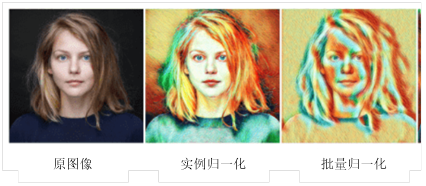
 图2-51 在图像风格化中两种归一化方法效果比较


### 2.7.2 归一化的原理
1. 批量归一化（Batch Normalization，BN）的数学表达式    
假设批量大小为m，一批样本中其中某个个特征为$x_1,x_2,⋯,x_m$。在神经网络中，可认为对应某个神经元，该神经元对应的输入值$x_i$。
该批次中这个特征的均值和方差为：  
$$μ=1/m ∑_{i=1}^mx_i 								\tag{2.8}$$
$$σ^2=1/m ∑_{i=1}^m(x_i-μ)^2 						\tag{2.9}$$
其中，μ称为平移参数（shift parameter），σ称为缩放参数（scale parameter）。通过这两个参数进行平移和缩放变换得到：
$$x ̂_i=\frac{x_i-μ}{\sqrt{σ^2+ε}}								\tag{2.10}$$
为了保证模型的表达能力不因为规范化而下降，可以通过一个附加的再缩放参数和再平移变换，将 上一步得到$x ̂_i$进一步变换为：
$$y_i=x ̂_i*γ+β							\tag{2.11}$$
其中，γ初始值一般为1，β初始值一般设为0，这两个参数在训练过程中将不断进行学习更新。添加参数γ和β是为了尽量与底层神经网络的学习结果保存一致，将规范化后的数据进行再平移和再缩放，使得每个神经元对应的输入范围是针对该神经元量身定制的一个确定范围（均值为β 、方差为$γ^2$）。
除了充分利用底层学习的能力，另一方面的重要意义在于保证获得非线性的表达能力。Sigmoid 等激活函数在神经网络中有着重要作用，通过区分饱和区和非饱和区，使得神经网络的数据变换具有了非线性计算能力。而第一步的规范化会将几乎所有数据映射到激活函数的非饱和区（线性区），仅利用到了线性变化能力，从而降低了神经网络的表达能力。而进行再变换，则可以将数据从线性区变换到非线性区，恢复模型的表达能力。

2. 层归一化（Layer Normalization，LN ）的数学表达式  
批量归一化比较适合于批量比较大的情况，这样批量数据分布与整体分布较接近。在进行训练之前，要做好充分的 打乱（Shuffle）， 否则效果会差很多，此外，批量归一化的对输入数据不一致的情况，效果将受到影响。
为克服批量归一化这些方面的不足，人们提出层规范化方法。层规范化就是针对 BN 的上述不足而提出的。与 BN 不同，LN 是对一个样本的所有特征的规范化。它综合考虑一层所有维度的输入，计算该层的平均输入值和输入方差，然后用同一个规范化操作来转换各个维度的输入。假设一个样本的特征数为n（或对应神经网络层所有的输入神经元的个数），则层归一化的表示式为：
$$μ=1/n ∑_{i=1}^n x_i 							\tag{2.12}$$
$$σ^2=1/n ∑_{i=1}^n(x_i-μ)^2 					\tag{2.13}$$
$$x ̂_i=\frac{x_i-μ}{\sqrt{σ^2+ε}}							\tag{2.14}$$
$$y_i=x ̂_i*γ+β						\tag{2.15}$$
 与批量归一化不同，层归一化中γ、 β一般为标量。
LN 针对单个训练样本进行，不依赖于其他数据，因此可以避免 BN 中受小批量 数据分布影响的问题，可以用于小批量场景、动态网络场景和 循环神经网络等，特别是自然语言处理领域，如在Transformer中得到广泛使用。此外，LN 不需要保存 批量 的均值和方差，节省了额外的存储空间。
3.实例归一化（Instance Normalization，IN ）的数学表达式
BN注重对每个batch进行归一化，保证数据分布一致，因为判别模型中结果取决于数据整体分布。但是图像风格化中，生成结果主要依赖于某个图像实例，所以对整个batch归一化不适合图像风格化中，因而对HW做归一化。可以加速模型收敛，并且保持每个图像实例之间的独立，实例归一化的公式：
$$μ_{ti}=\frac{1}{HW} ∑_{l=1}^W ∑_{m=1}^H x_{tilm}  						\tag{2.16}$$
$$(σ_{ti})^2=\frac{1}{HW} ∑_{l=1}^W ∑_{m=1}^H(x_{tilm}-μ_{ti} )^2 〗					\tag{2.17}$$
$$x ̂_{ti}=\frac{x_{tilm}-μ_{ti}}{\sqrt{σ_{ti}^2+ε}}								\tag{2.18}$$
$$y_{ti}=x ̂_{ti}*γ+β							\tag{2.19}$$
不过，BN 的转换是针对单个神经元可训练的——不同神经元的输入经过再平移和再缩放后分布在不同的区间，而LN对于一整层的神经元训练得到同一个转换——所有的输入都在同一个区间范围内。如果不同输入特征不属于相似的类别（比如颜色和大小），那么 降低LN 的效果。
### 2.7.3 归一化的代码实现
1. 批量归一化的Python实现
（1）定义批量归一化的函数
这里假设输入为4维数据，即[batch size,channels,higt,width]


In [3]:
from torch import nn
import torch

In [4]:
def f_batch_norm(X, gamma, beta, eps, momentum):
    # 训练模式，输入数据为4维的情况
    # 使用二维卷积层的情况，计算通道维上（axis=1）的均值和方差。或在[N,H,W]求统计信息
    #这里我们需要保持X的形状以便后面可以做广播运算
    mean = X.mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
    var = ((X - mean) ** 2).mean(dim=0, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
    # 训练模式下用当前的均值和方差做标准化
    X_hat = (X - mean) / torch.sqrt(var + eps)
    
    # 更新移动平均的均值和方差
    #moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
    #moving_var = momentum * moving_var + (1.0 - momentum) * var
    Y = gamma * X_hat + beta  # 拉伸和偏移
    return Y


（2）把批量归一化函数封装在一个类中

In [5]:
class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims=4):
        super(BatchNorm, self).__init__()
        shape = (1, num_features, 1, 1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成0和1
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
    def forward(self, X):
        # 调用函数f_batch_norm
        Y = f_batch_norm(X, self.gamma, self.beta,eps=1e-5, momentum=0.9)
        return Y


（3）定义一个输入

In [6]:
input = torch.tensor([[
                [[1,1,1],[10,1,1],[1,1,1],[1,1,1],[1,1,1]],
                [[2,2,2],[20,2,2],[2,2,2],[2,2,2],[2,2,2]],
                [[3,3,3],[30,3,3],[3,3,3],[3,3,3],[3,3,3]],
                [[4,4,4],[40,4,4],[4,4,4],[4,4,4],[4,4,4]],
                [[5,5,5],[50,5,5],[5,5,5],[5,5,5],[5,5,5]]
        ]]).float()
input1 = input.permute(0,3,1,2) #把input的形状改为[1,3,5,5],即[batch,channels,hight,width]格式

（4）测试

In [7]:
#通道数相当于特征向量个数（num_features），实例化BatchNorm类
BN=BatchNorm(3)
BN(input1)


tensor([[[[-0.5883,  0.1272, -0.5883, -0.5883, -0.5883],
          [-0.5088,  0.9221, -0.5088, -0.5088, -0.5088],
          [-0.4293,  1.7171, -0.4293, -0.4293, -0.4293],
          [-0.3498,  2.5121, -0.3498, -0.3498, -0.3498],
          [-0.2703,  3.3070, -0.2703, -0.2703, -0.2703]],

         [[-1.4142, -1.4142, -1.4142, -1.4142, -1.4142],
          [-0.7071, -0.7071, -0.7071, -0.7071, -0.7071],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.7071,  0.7071,  0.7071,  0.7071,  0.7071],
          [ 1.4142,  1.4142,  1.4142,  1.4142,  1.4142]],

         [[-1.4142, -1.4142, -1.4142, -1.4142, -1.4142],
          [-0.7071, -0.7071, -0.7071, -0.7071, -0.7071],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.7071,  0.7071,  0.7071,  0.7071,  0.7071],
          [ 1.4142,  1.4142,  1.4142,  1.4142,  1.4142]]]],
       grad_fn=<AddBackward0>)

2.用PyTorch实现批量归一化

In [8]:
BN2=nn.BatchNorm2d(3) 
BN2(input1)


tensor([[[[-0.5883,  0.1272, -0.5883, -0.5883, -0.5883],
          [-0.5088,  0.9221, -0.5088, -0.5088, -0.5088],
          [-0.4293,  1.7171, -0.4293, -0.4293, -0.4293],
          [-0.3498,  2.5121, -0.3498, -0.3498, -0.3498],
          [-0.2703,  3.3070, -0.2703, -0.2703, -0.2703]],

         [[-1.4142, -1.4142, -1.4142, -1.4142, -1.4142],
          [-0.7071, -0.7071, -0.7071, -0.7071, -0.7071],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.7071,  0.7071,  0.7071,  0.7071,  0.7071],
          [ 1.4142,  1.4142,  1.4142,  1.4142,  1.4142]],

         [[-1.4142, -1.4142, -1.4142, -1.4142, -1.4142],
          [-0.7071, -0.7071, -0.7071, -0.7071, -0.7071],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.7071,  0.7071,  0.7071,  0.7071,  0.7071],
          [ 1.4142,  1.4142,  1.4142,  1.4142,  1.4142]]]],
       grad_fn=<NativeBatchNormBackward0>)

参数说明：
- num_features (int)：输入的特征数，这里指通道数，即[B,C,H,W]中的C。
- eps:为保证数值稳定性（分母不能趋近或取0）,给分母加上的值(对应公式中的ε)。默认为1e-5。
- momentum：动态均值和动态方差所使用的动量。默认为0.1。
- affine：布尔值，缺省值为True，当设为true，给该层添加可学习的再变换参数，即使用公式中的γ、β可学习参数。
- track_running_stats：布尔值，当设为true，记录训练过程中的均值和方差。
输入形状：[B,C,H,W]
输出形状：[B,C,H,W]
	用Python实现层归一化
层归一化可用于图像或NLP处理，对图像处理的输入假设为4维，即[N,C,H,W]。对于NLP处理，其输入为3维，即[batch_size, time_steps, embedding_dim]。  
（1）输入为图像的情况  
1）定义层归一化函数。  


In [9]:
def f_layer_norm(X, gamma, beta, eps, momentum):
    # 训练模式，输入数据为4维的情况
    # 使用二维卷积层的情况，计算批量维上（axis=0）的均值和方差。即在[C,H,W]求统计信息
    #这里我们需要保持X的形状以便后面可以做广播运算
    mean = X.mean(dim=1, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
    var = ((X - mean) ** 2).mean(dim=1, keepdim=True).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
    # 训练模式下用当前的均值和方差做标准化
    X_hat = (X - mean) / torch.sqrt(var + eps)    
    Y = gamma * X_hat + beta  # 拉伸和偏移
    return Y


2）把层归一化函数封装在类中。

In [10]:
class LayerNorm(nn.Module):
    def __init__(self,num_dims=4):
        super(LayerNorm, self).__init__()
        #shape = (1, num_features, 1, 1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成0和1
        self.gamma = nn.Parameter(torch.ones(1))
        self.beta = nn.Parameter(torch.zeros(1))
    def forward(self, X):
        # 调用函数f_batch_norm
        Y = f_layer_norm(X, self.gamma, self.beta,eps=1e-5, momentum=0.9)
        return Y

3）测试。

In [11]:
#使用PyTorch的层归一化模块
LN4=LayerNorm()
LN4(input1)


tensor([[[[-0.4883,  0.6682, -0.4883, -0.4883, -0.4883],
          [-0.3598,  1.9532, -0.3598, -0.3598, -0.3598],
          [-0.2313,  3.2382, -0.2313, -0.2313, -0.2313],
          [-0.1028,  4.5232, -0.1028, -0.1028, -0.1028],
          [ 0.0257,  5.8083,  0.0257,  0.0257,  0.0257]],

         [[-0.4883, -0.4883, -0.4883, -0.4883, -0.4883],
          [-0.3598, -0.3598, -0.3598, -0.3598, -0.3598],
          [-0.2313, -0.2313, -0.2313, -0.2313, -0.2313],
          [-0.1028, -0.1028, -0.1028, -0.1028, -0.1028],
          [ 0.0257,  0.0257,  0.0257,  0.0257,  0.0257]],

         [[-0.4883, -0.4883, -0.4883, -0.4883, -0.4883],
          [-0.3598, -0.3598, -0.3598, -0.3598, -0.3598],
          [-0.2313, -0.2313, -0.2313, -0.2313, -0.2313],
          [-0.1028, -0.1028, -0.1028, -0.1028, -0.1028],
          [ 0.0257,  0.0257,  0.0257,  0.0257,  0.0257]]]],
       grad_fn=<AddBackward0>)

（3）使用PyTorch的模块实现以上功能

In [13]:
layer_norm = nn.LayerNorm([3, 5, 5])
output = layer_norm(input1)
print(output)


tensor([[[[-0.4883,  0.6682, -0.4883, -0.4883, -0.4883],
          [-0.3598,  1.9532, -0.3598, -0.3598, -0.3598],
          [-0.2313,  3.2382, -0.2313, -0.2313, -0.2313],
          [-0.1028,  4.5232, -0.1028, -0.1028, -0.1028],
          [ 0.0257,  5.8083,  0.0257,  0.0257,  0.0257]],

         [[-0.4883, -0.4883, -0.4883, -0.4883, -0.4883],
          [-0.3598, -0.3598, -0.3598, -0.3598, -0.3598],
          [-0.2313, -0.2313, -0.2313, -0.2313, -0.2313],
          [-0.1028, -0.1028, -0.1028, -0.1028, -0.1028],
          [ 0.0257,  0.0257,  0.0257,  0.0257,  0.0257]],

         [[-0.4883, -0.4883, -0.4883, -0.4883, -0.4883],
          [-0.3598, -0.3598, -0.3598, -0.3598, -0.3598],
          [-0.2313, -0.2313, -0.2313, -0.2313, -0.2313],
          [-0.1028, -0.1028, -0.1028, -0.1028, -0.1028],
          [ 0.0257,  0.0257,  0.0257,  0.0257,  0.0257]]]],
       grad_fn=<NativeLayerNormBackward0>)


运行结果与使用Python实现的完全一致。  
（4）输入为语句的情况

In [14]:
# 在 NLP 中测试 LayerNorm
batch_size = 2
time_steps = 3
embedding_dim = 4
input_x = torch.randn(batch_size, time_steps, embedding_dim)  # N * L * C
# PyTorch的模块
Layer_norm_op=torch.nn.LayerNorm(normalized_shape=embedding_dim, elementwise_affine=True)
ln_y = Layer_norm_op(input_x)
print(ln_y)

tensor([[[-0.8820,  0.5887,  1.3367, -1.0434],
         [ 0.3578,  1.4697, -1.0588, -0.7687],
         [ 0.4869,  0.3649, -1.7040,  0.8521]],

        [[-1.1159, -0.1948,  1.6191, -0.3084],
         [ 0.4189, -0.3103,  1.3099, -1.4186],
         [-0.5773,  0.4776, -1.2604,  1.3601]]],
       grad_fn=<NativeLayerNormBackward0>)


4. 用Python实现实例归一化  
实例归一化可用对图像处理的输入假设为4维，即[N,C,H,W]。  
（1）定义Instance Norm函数

In [15]:
def f_Instancenorm(X, gamma, beta, eps):
    # 训练模式，输入数据为4维的情况
    # 使用二维卷积层的情况，计算H,W维上（axis=2,3）的均值和方差。即在[H,W]求统计信息
    #这里我们需要保持X的形状以便后面可以做广播运算
    mean = X.mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
    var = ((X - mean) ** 2).mean(dim=2, keepdim=True).mean(dim=3, keepdim=True)
    # 训练模式下用当前的均值和方差做标准化
    X_hat = (X - mean) / torch.sqrt(var + eps)
    
    Y = gamma * X_hat + beta  # 拉伸和偏移
    return Y

（2）把函数包装在PyTorch类中

In [16]:
class Instancenorm(nn.Module):
    def __init__(self,num_dims=4):
        super(Instancenorm, self).__init__()
        #shape = (1, num_features, 1, 1)
        # 参与求梯度和迭代的拉伸和偏移参数，分别初始化成0和1
        self.gamma = nn.Parameter(torch.ones(1))
        self.beta = nn.Parameter(torch.zeros(1))
    def forward(self, X):
        # 调用函数f_Instancenorm
        Y = f_Instancenorm(X, self.gamma, self.beta,eps=1e-5)
        return Y

（3）测试

In [17]:
ins=Instancenorm()
ins(input1)

tensor([[[[-0.5883,  0.1272, -0.5883, -0.5883, -0.5883],
          [-0.5088,  0.9221, -0.5088, -0.5088, -0.5088],
          [-0.4293,  1.7171, -0.4293, -0.4293, -0.4293],
          [-0.3498,  2.5121, -0.3498, -0.3498, -0.3498],
          [-0.2703,  3.3070, -0.2703, -0.2703, -0.2703]],

         [[-1.4142, -1.4142, -1.4142, -1.4142, -1.4142],
          [-0.7071, -0.7071, -0.7071, -0.7071, -0.7071],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.7071,  0.7071,  0.7071,  0.7071,  0.7071],
          [ 1.4142,  1.4142,  1.4142,  1.4142,  1.4142]],

         [[-1.4142, -1.4142, -1.4142, -1.4142, -1.4142],
          [-0.7071, -0.7071, -0.7071, -0.7071, -0.7071],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.7071,  0.7071,  0.7071,  0.7071,  0.7071],
          [ 1.4142,  1.4142,  1.4142,  1.4142,  1.4142]]]],
       grad_fn=<AddBackward0>)

（4）直接使用PyTorch提供的模块

In [18]:
# 带可学习的参数affine=True
m = nn.InstanceNorm2d(3, affine=True)
output = m(input1)

**<font color=blue size=3>用PyTorch提供的模块的运行结果与自定义Instancenorm的运行结果完全一致。</font>**